# A4 Assignment – Geospatial Tile NDVI with VirtuGhan

This notebook demonstrates how to fetch and process NDVI tiles using the `VirtuGhan` helper via the `vcube` package. The tile corresponds to a region over Bucharest, Romania, for a defined date range.

We modularized the workflow into a `.py` file with reusable functions, fulfilling the structure required in Assignment A4.


In [1]:
#!git clone https://github.com/kshitijrajsharma/virtughan.git

In [2]:
!pip install VirtuGhan==0.6.0

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.3.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.0-cp312-cp312-win_amd64.whl (12.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.0 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.0 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.2.1 which is incompatible.


In [4]:
!pip install "numpy<2"


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
virtughan 0.6.0 requires numpy<3.0.0,>=2.2.1, but you have numpy 1.26.4 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.2.1 which is incompatible.


In [5]:
import nest_asyncio
nest_asyncio.apply()

from A4_utils import fetch_ndvi_tile, compute_ndvi
from IPython.display import Image as display_image


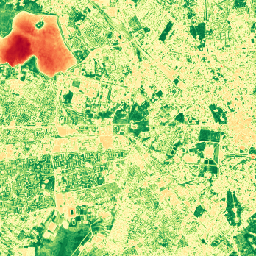

In [9]:
# Fetch & display the NDVI tile
from IPython.display import display

# Fetch the tile but don’t write it to disk
img, feature = fetch_ndvi_tile(
    lat=44.43, lon=26.10,
    zoom=12,
    start_date="2024-04-01",
    end_date="2024-04-30",
    cloud_cover=30
)

# Display the PIL image inline
display(img)



In [24]:
import mercantile

# Get x, y, z tile coordinates from lat, lon, zoom
tile = mercantile.tile(lon, lat, zoom)
x, y, z = tile.x, tile.y, tile.z

# Save NDVI image using the provided function
save_tile_image(img, x, y, z, output_folder="A4_Outputs")


Saved tile image as: A4_Outputs/tile_2344_1482_12.png
